In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(88)

In [2]:
plt.rcParams['figure.figsize'] = (17,8)
plt.rcParams['font.size'] = 14

# PART 1 - Simple Hill Climbing

### Hill Climbing - Example 1

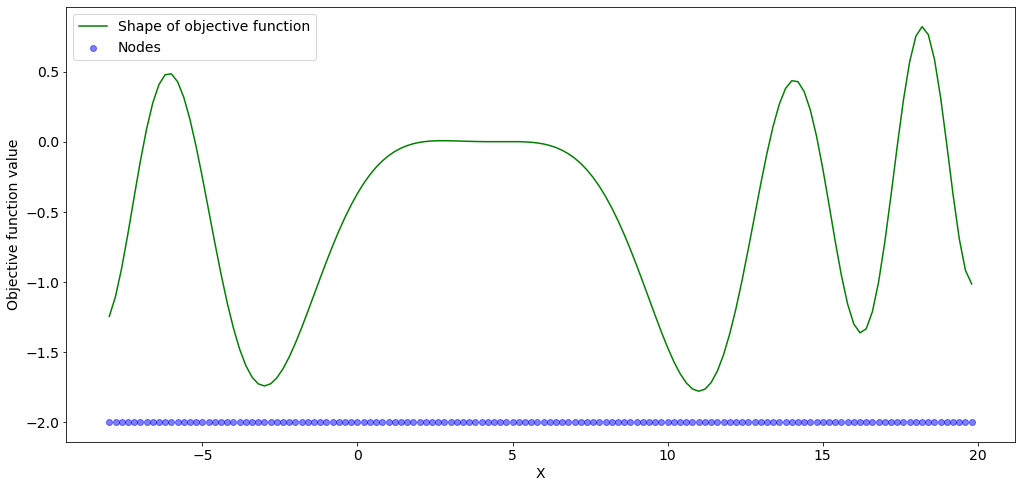

In [3]:
# Define the objective function
def objective(x):
    return np.cos((x/4-1)**2) + np.sin(x/10-2)

X = np.arange(-8,20,0.20).round(decimals =1)
y = objective(X)

# Plot objective functions and nodes

plt.plot(X,y, label ='Shape of objective function', color = 'green')
plt.scatter(X, np.full_like(X , -2), alpha =0.5, label ='Nodes', color = 'blue')
plt.xlabel('X')
plt.ylabel('Objective function value')
plt.legend()
plt.show()

In [4]:
def simple_hill(objective_function, search_space_nodes, step_size = 0.2, iterations = 100, display_plot = True):
    
    # Pick a starting random node
    start_point = np.random.choice(search_space_nodes)
        
    # Initialize list to collect steps
    path = []
    path.append(start_point)
    
    # Loop until convergence
    next_step = start_point
    for i in range(iterations):
        current_node_obj_value = objective_function(next_step)
        
        node_right = (next_step + step_size).round(decimals =1)
        node_left = (next_step - step_size).round(decimals =1)
        
        right_node_obj_value = objective_function(node_right)
        left_node_obj_value  = objective_function(node_left)
        
        if right_node_obj_value > current_node_obj_value and left_node_obj_value < current_node_obj_value:
            next_step = node_right
  
        elif left_node_obj_value > current_node_obj_value and right_node_obj_value < current_node_obj_value:
            next_step = node_left 
        
        else:
            break
            
        path.append(next_step)
  
    if display_plot == True:
        # Plot final results
        y = objective_function(search_space_nodes)
        path_y = objective_function(np.array(path))

        plt.plot(X,y, label ='Shape of objective function', color = 'green')
        plt.scatter(X, np.full_like(X , -2), alpha =0.5, label ='Nodes', color = 'blue')
        plt.scatter(path, path_y , label = 'Hill climbing path' , color = 'red')
        plt.legend()
        plt.show()
        
    # Max value of objective function 
    final_value_obj = objective_function(next_step) 
    
    return next_step, final_value_obj


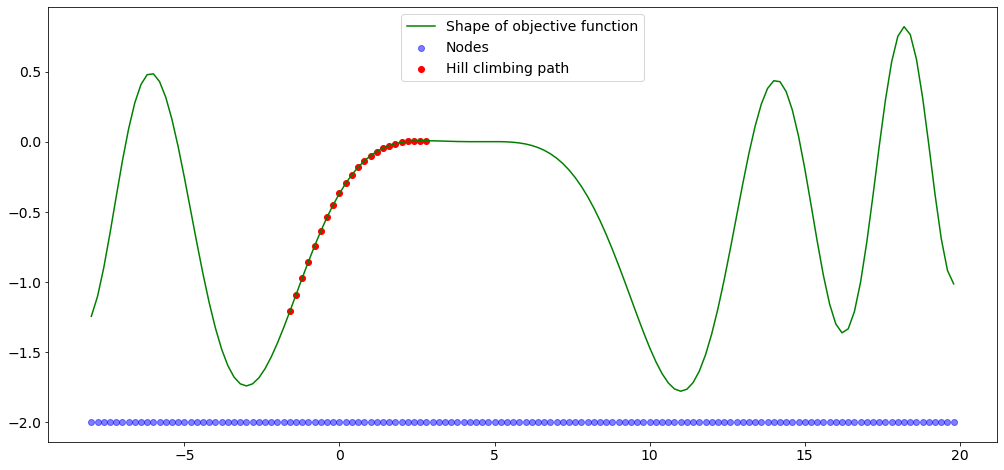

In [5]:
X_location_max, y_max = simple_hill(objective_function=objective, search_space_nodes = X )

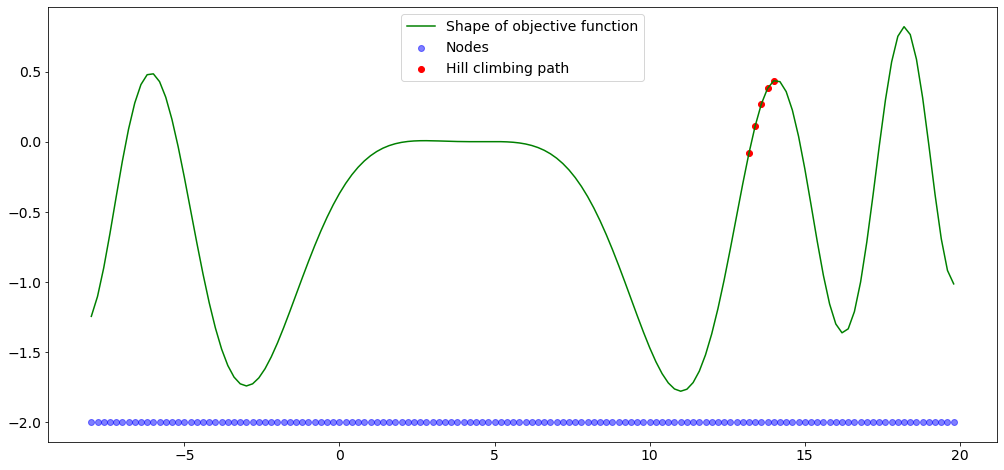

In [6]:
X_location_max, y_max = simple_hill(objective_function=objective, search_space_nodes = X )

### Multiple restarts

In [12]:
max__obj_values = []
x_values = []

for n in range(30):
    X_location_max, y_max = simple_hill(objective_function=objective, search_space_nodes = X, display_plot = False )
    max__obj_values.append(y_max)
    x_values.append(X_location_max)
    

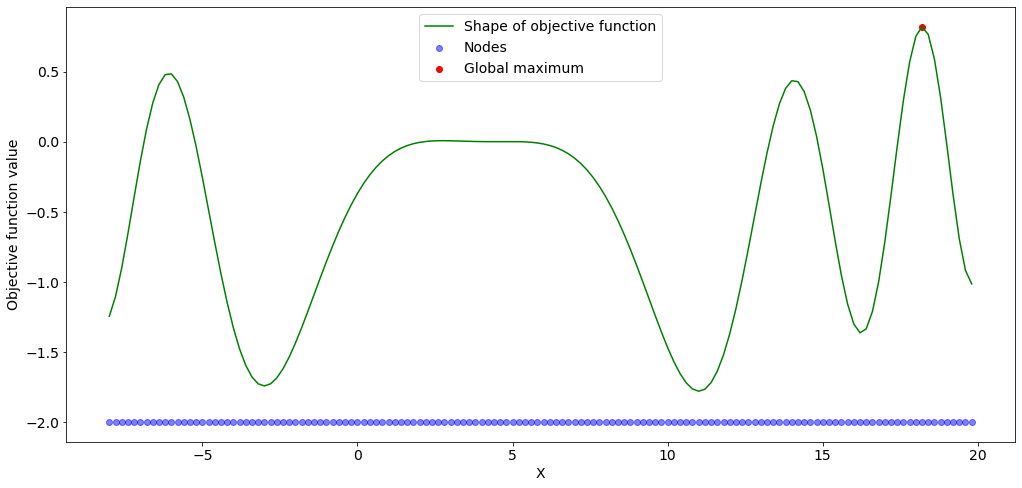

In [13]:
# Extract the probable global value and its location
probable_global_maximum_value = max(max__obj_values)
probable_global_maximum_value_index = max__obj_values.index(probable_global_maximum_value)
probable_global_maximum_location = x_values[probable_global_maximum_value_index]

# Plot original data with "global maximum coordinates"
plt.plot(X,y, label ='Shape of objective function', color = 'green')
plt.scatter(X, np.full_like(X , -2), alpha =0.5, label ='Nodes', color = 'blue')
plt.scatter(probable_global_maximum_location, probable_global_maximum_value, label ='Global maximum', color = 'red')
plt.xlabel('X')
plt.ylabel('Objective function value')
plt.legend()
plt.show()

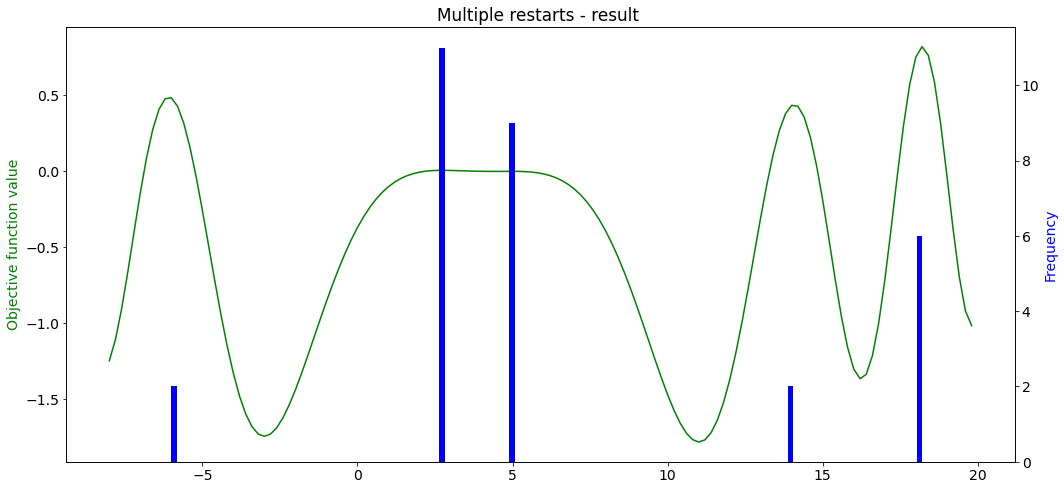

In [14]:
# Plot the histogram of maximum location over all the iterations
fig, ax1 = plt.subplots()
plt.title('Multiple restarts - result ')
ax2 = ax1.twinx()

ax1.plot(X,y, color = 'green')
ax2.hist(x_values, bins = 140 , color = 'blue')


plt.xlabel('X')
ax1.set_ylabel('Objective function value', color = 'green')
ax2.set_ylabel('Frequency', color = 'blue')
plt.show()

### Hill Climbing - Example 2

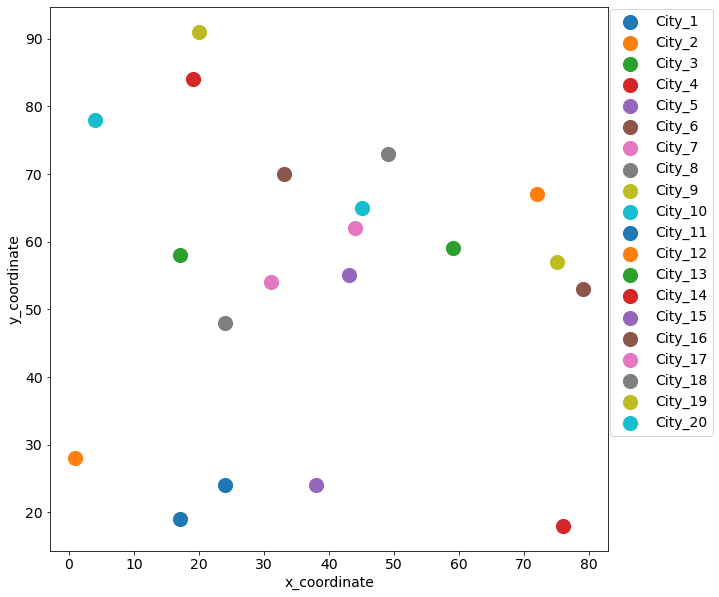

In [20]:
# Create a virtual map of the cities and store the information in a dataframe

n_cities = 20        # Number of cities to arrange
max_coordinate = 100 # Size of the map (max_coordinate, max_coordinate)
location_cities = np.random.choice(max_coordinate, size = (n_cities,2) )  # Arrange the cities on the map

# Create the dataframe
cities = ['City_' + str(i) for i in range(1, n_cities + 1)]
df = pd.DataFrame(location_cities, columns = ['x', 'y'])
df['City'] = cities

# Plot the cities
plt.figure(figsize = (10,10))
for index, row in df.iterrows():
    plt.scatter(row['x'], row['y'], s = 200, label = row['City'])
    plt.xlabel('x_coordinate')
    plt.ylabel('y_coordinate')
plt.legend(bbox_to_anchor= (0.7, 0.51, 0.5, 0.5))
plt.show()

In [21]:
# Function that randomly picks a path
def start_random_tour(df):
    return df.sample(frac=1)

# Function that calculates total distance
def calculate_distance_sequence(df):
    # Euclidean distance
    df_m = df.append(df.iloc[0,:]) # Need to append the start city to complete the tour
    df_m['x_d'] = df_m['x'].diff()**2
    df_m['y_d'] = df_m['y'].diff()**2
    tot_distance = np.sum(np.sqrt(df_m['x_d'] + df_m['y_d']))
    return int(tot_distance)

# Generator that swaps cities 
def swap_cities(df):
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            df_copy = df.copy()
            df_copy.iloc[i,:] = df.iloc[j,:]
            df_copy.iloc[j,:] = df.iloc[i,:]
            yield df_copy
     
    
# Function that plots the path
def plot_path(df, iterations):
    
    start_city = df.iloc[0,-1]
    
    df_m = df.append(df.iloc[0,:])
        
    plt.figure(figsize = (10,10))
    plt.title(f'Path with start city {start_city} and {iterations} iterations')
    for index, row in df_m.iterrows():
        if row['City'] == start_city:
            s = 400
        else:
            s = 100
        plt.scatter(row['x'], row['y'], s = s, label = row['City'])
        plt.xlabel('x_coordinate')
        plt.ylabel('y_coordinate')
    for i in range(len(df_m)-1):
        df_m.iloc[i,0]
        plt.plot([df_m.iloc[i,0],df_m.iloc[i+1,0]], [df_m.iloc[i,1],df_m.iloc[i+1,1]] )
        plt.arrow(x = df_m.iloc[i,0], 
                  y = df_m.iloc[i,1], 
                  dx = df_m.iloc[i+1,0]- df_m.iloc[i,0],
                  dy = df_m.iloc[i+1,1]- df_m.iloc[i,1], 
                  width = 0.5,
                  length_includes_head = True,
                  alpha = 0.5)
    plt.legend(bbox_to_anchor= (0.7, 0.51, 0.5, 0.5))
    plt.show()

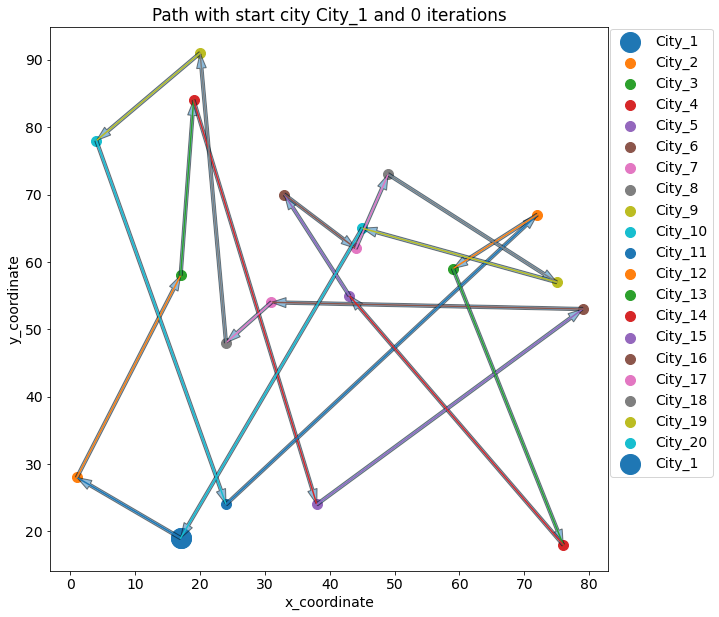

Tour by city's name is 703 units long


In [22]:
# Plot path by city's name
plot_path(df, iterations = 0)
distance_by_city_name = calculate_distance_sequence(df)
print(f'Tour by city\'s name is {distance_by_city_name} units long')

**The Hill Climbing algorithm**

In [23]:
# Function the performs simple hill climbing
def Hill_Climbing(df, initialization_f, distance_f, neighbors_f, iterations = 100 ):
    
    initial_tour = initialization_f(df) # Pick a random path 
    distance = distance_f(initial_tour) # Calculate the distance of the random path
    
    # Main loop
    for i in range(iterations): 
        
        for next in swap_cities(initial_tour):
            next_swap = next
            next_swap_distance = distance_f(next_swap)
            
            if next_swap_distance < distance:
                initial_tour = next_swap
                distance = next_swap_distance
                break
    # Return the final path, and its distance 
    return initial_tour, distance_f(initial_tour)

Best tour found is 644 units long with 10 iterations


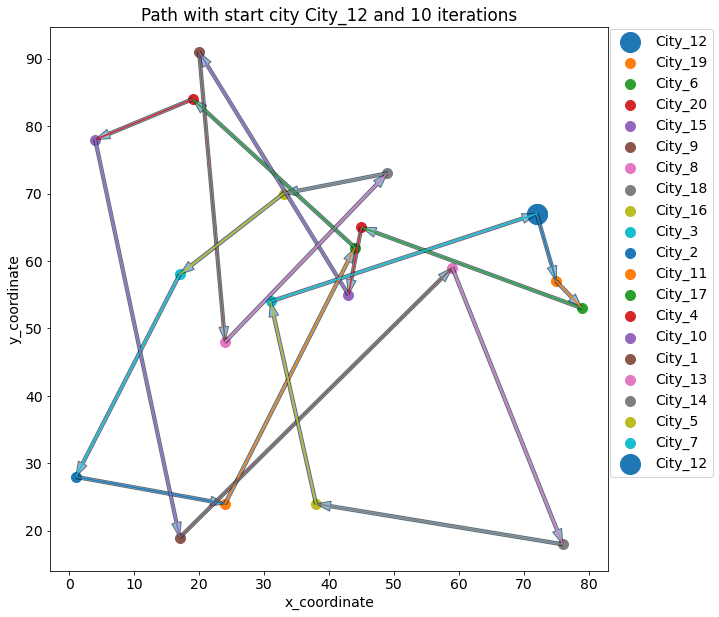

In [24]:
# Run the Hill Climbing algorithm with 10 iterations
iterations = 10
final_tour, distance = Hill_Climbing(df, start_random_tour, calculate_distance_sequence, swap_cities, iterations = iterations )

# The best tour distance
print(f'Best tour found is {distance} units long with {iterations} iterations')

plot_path(final_tour, iterations = iterations)

Best tour found is 375 units long with 100 iterations


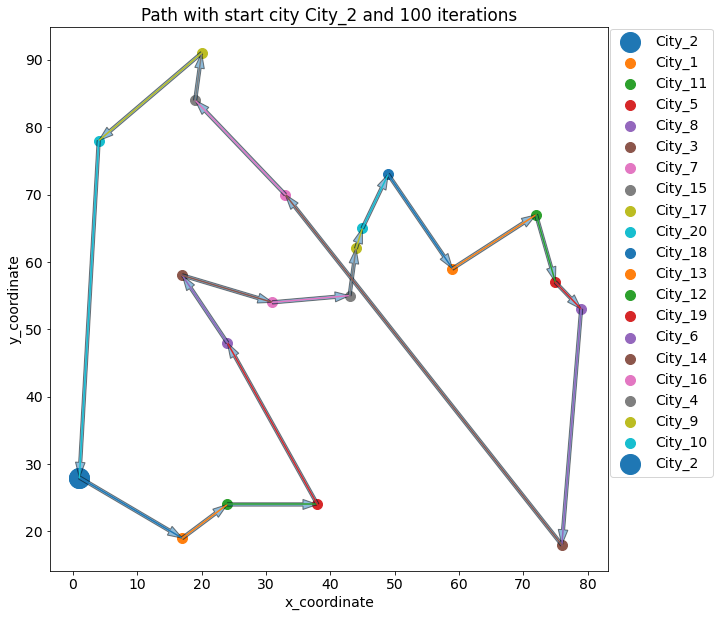

In [25]:
# Run the Hill Climbing algorithm with 100 iterations
iterations = 100
final_tour, distance = Hill_Climbing(df, start_random_tour, calculate_distance_sequence, swap_cities, iterations = iterations )

# The best tour distance
print(f'Best tour found is {distance} units long with {iterations} iterations')

plot_path(final_tour, iterations = iterations)

# PART 2 - Steepest Ascent Hill Climbing

In [26]:
# Function that randomly picks a path
def start_random_tour(df):
    return df.sample(frac=1)

# Function that calculates total distance
def calculate_distance_sequence(df):
    # Euclidean distance
    df_m = df.append(df.iloc[0,:]) # Need to append the start city to complete the tour
    df_m['x_d'] = df_m['x'].diff()**2
    df_m['y_d'] = df_m['y'].diff()**2
    tot_distance = np.sum(np.sqrt(df_m['x_d'] + df_m['y_d']))
    return int(tot_distance)

# Function that collects all 2-city swaps 
def swap_cities(df):
    neighbors = []
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            df_copy = df.copy()
            df_copy.iloc[i,:] = df.iloc[j,:]
            df_copy.iloc[j,:] = df.iloc[i,:]
            
            neighbors.append(df_copy)
            
    return neighbors

**The Steepest Ascent Hill Climbing Algorithm**

In [27]:
# Function the performs simple hill climbing
def Steepest_Ascent_Hill_Climbing(df, initialization_f, distance_f, neighbors_f, iterations = 100 ):
    
    initial_tour = initialization_f(df) # Pick a random path 
    distance = distance_f(initial_tour) # Calculate the distance of the random path
    
    # Main loop
    for i in range(iterations): 
        
        # Generate all neighbors
        neighbors = neighbors_f(initial_tour)
        distances_neighbors = []
        
        # Loop over each neighbor and calculate the distance
        for n in neighbors:
            d = distance_f(n)
            distances_neighbors.append(d)
        
        # Get the index of the shortest distance
        min_distance_index = distances_neighbors.index(min(distances_neighbors))
        # Get the relative neighbor 
        initial_tour = neighbors[min_distance_index]
        
        
        
    # Return the final path, and its distance 
    return initial_tour, distance_f(initial_tour)

Best tour found is 389 units long with 10 iterations


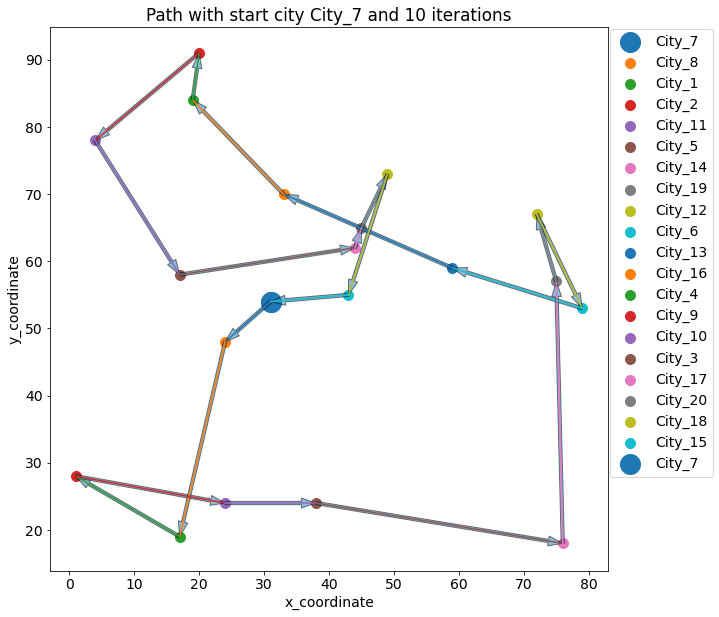

In [28]:
# Run the Steepest Ascent Hill Climbing algorithm with 10 iterations
iterations = 10
final_tour, distance = Steepest_Ascent_Hill_Climbing(df, start_random_tour, calculate_distance_sequence, swap_cities, iterations = iterations )

# The best tour distance
print(f'Best tour found is {distance} units long with {iterations} iterations')

plot_path(final_tour, iterations = iterations)